IMPORT TRAIN DATA

In [35]:
import os
import pandas 
import matplotlib.pyplot as plt
import seaborn as sns
from time import time


In [36]:
col_names = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent", "hot", 
             "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations", 
             "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login", "count", "srv_count", 
             "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", 
             "srv_diff_host_rate", "dst_host_count","dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate", 
             "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate", 
             "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]
kdd_data_10percent = pandas.read_csv("C:\\Users\\TienDat\\Documents\\GitHub\\Intrusion-Detection-System\\dataset\\kddcup.data_10_percent.gz", names = col_names)
kdd_data_10percent.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [37]:
kdd_data_10percent['label'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: label, dtype: int64

In [38]:
num_features = ["duration", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", 
                "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells",
                "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate", 
                "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate",
                "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate", 
                "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
                "dst_host_rerror_rate", "dst_host_srv_rerror_rate"]
features = kdd_data_10percent[num_features].astype(float)
features.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,181.0,5450.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,9.0,9.0,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0.0,239.0,486.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,19.0,19.0,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0.0,235.0,1337.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,29.0,29.0,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0.0,219.0,1337.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,39.0,39.0,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0.0,217.0,2032.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,49.0,49.0,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0


In [39]:
labels = kdd_data_10percent['label'].copy()
labels[labels != 'normal.'] = 'attack.'
labels.value_counts()

attack.    396743
normal.     97278
Name: label, dtype: int64

In [40]:
#Ignoring the deprecation warnings
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning) 

#Rescaling the data
from sklearn.preprocessing import MinMaxScaler
features.apply(lambda x : MinMaxScaler())
features.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,181.0,5450.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,9.0,9.0,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0.0,239.0,486.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,19.0,19.0,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0.0,235.0,1337.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,29.0,29.0,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0.0,219.0,1337.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,39.0,39.0,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0.0,217.0,2032.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,49.0,49.0,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0


TRAINING CLASSIFIERS

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

GAUSSIAN NAIVE BAYES

In [42]:
GNB = GaussianNB()
t0 = time()
GNB.fit(features, labels)
GNB_train_time = time() - t0
print ("GaussianNB trained in {} seconds.".format(round(GNB_train_time, 3)))

GaussianNB trained in 0.799 seconds.


In [43]:
GNB_train_score = GNB.score(features,labels)
print ("GaussianNB's train accuracy: ",GNB_train_score)

GaussianNB's train accuracy:  0.9455144619358287


LINEAR DISCRIMINANT ANALYSIS

In [44]:
LDA = LinearDiscriminantAnalysis()
t0 = time()
LDA.fit(features, labels)
LDA_train_time = time() - t0
print ("LinearDiscriminantAnalysis trained in {} seconds.".format(round(LDA_train_time, 3)))

LinearDiscriminantAnalysis trained in 3.714 seconds.


In [45]:
LDA_train_score = LDA.score(features,labels)
print ("LinearDiscriminantAnalysis's train accuracy: ",LDA_train_score)

LinearDiscriminantAnalysis's train accuracy:  0.9876847340497671


DECISION TREE

In [46]:
DT = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
t0 = time()
DT.fit(features, labels)
DT_train_time = time() - t0
print ("DecisionTreeClassifier trained in {} seconds.".format(round(DT_train_time, 3)))

DecisionTreeClassifier trained in 0.913 seconds.


In [47]:
DT_train_score = DT.score(features,labels)
print ("DecisionTreeClassifier's train accuracy: ",DT_train_score)

DecisionTreeClassifier's train accuracy:  0.9953200370024756


RANDOM FOREST

In [48]:
RF = RandomForestClassifier(n_estimators=30)
t0 = time()
RF.fit(features, labels)
RF_train_time = time() - t0
print ("RandomForestClassifier trained in {} seconds.".format(round(RF_train_time, 3)))

RandomForestClassifier trained in 5.972 seconds.


In [49]:
RF_train_score = RF.score(features,labels)
print ("RandomForestClassifier's train accuracy: ",RF_train_score)

RandomForestClassifier's train accuracy:  0.9999959515891025


LOGISTIC REGRESSION

In [50]:
LR= LogisticRegression(max_iter=1200000)
t0 = time()
LR.fit(features, labels)
LR_train_time = time() - t0
print ("LogisticRegression trained in {} seconds.".format(round(LR_train_time, 3)))

LogisticRegression trained in 7.284 seconds.


In [51]:
LR_train_score = LR.score(features,labels)
print ("LogisticRegression's train accuracy: ",LR_train_score)

LogisticRegression's train accuracy:  0.9843468192647681


GRADIENT BOOSTING

In [52]:
GB = GradientBoostingClassifier(random_state=0)
t0 = time()
GB.fit(features, labels)
GB_train_time = time() - t0
print ("GradientBoostingClassifier trained in {} seconds.".format(round(GB_train_time, 3)))

GradientBoostingClassifier trained in 47.56 seconds.


In [53]:
GB_train_score = GB.score(features,labels)
print ("GradientBoostingClassifier's train accuracy: ",GB_train_score)

GradientBoostingClassifier's train accuracy:  0.9991053011916498


ADABOOST

In [54]:
AB = AdaBoostClassifier()
t0 = time()
AB.fit(features, labels)
AB_train_time = time() - t0
print ("AdaBoostClassifier trained in {} seconds.".format(round(AB_train_time, 3)))

AdaBoostClassifier trained in 36.034 seconds.


In [55]:
AB_train_score = AB.score(features,labels)
print ("AdaBoostClassifier's train accuracy: ",AB_train_score)

AdaBoostClassifier's train accuracy:  0.9985526931041393


IMPORT TEST DATASET

In [56]:
kdd_data_corrected = pandas.read_csv("C:\\Users\\TienDat\\Documents\\GitHub\\Intrusion-Detection-System\\dataset\\corrected.gz", header=None, names = col_names)
kdd_data_corrected['label'].value_counts()

smurf.              164091
normal.              60593
neptune.             58001
snmpgetattack.        7741
mailbomb.             5000
guess_passwd.         4367
snmpguess.            2406
satan.                1633
warezmaster.          1602
back.                 1098
mscan.                1053
apache2.               794
processtable.          759
saint.                 736
portsweep.             354
ipsweep.               306
httptunnel.            158
pod.                    87
nmap.                   84
buffer_overflow.        22
multihop.               18
sendmail.               17
named.                  17
ps.                     16
xterm.                  13
rootkit.                13
teardrop.               12
xlock.                   9
land.                    9
xsnoop.                  4
ftp_write.               3
sqlattack.               2
worm.                    2
loadmodule.              2
udpstorm.                2
phf.                     2
perl.                    2
i

In [57]:
#Converting all the new attack labels to 'attack.'
kdd_data_corrected['label'][kdd_data_corrected['label']!='normal.'] = 'attack.'
kdd_data_corrected['label'].value_counts()

c:\Users\TienDat\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


attack.    250436
normal.     60593
Name: label, dtype: int64

In [58]:
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning) 
sc = MinMaxScaler()
kdd_data_corrected[num_features] = kdd_data_corrected[num_features].astype(float)
kdd_data_corrected[num_features].apply(lambda x: sc.fit_transform)
kdd_data_corrected.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0.0,udp,private,SF,105.0,146.0,0.0,0.0,0.0,0.0,...,254.0,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0.0,udp,private,SF,105.0,146.0,0.0,0.0,0.0,0.0,...,254.0,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0.0,udp,private,SF,105.0,146.0,0.0,0.0,0.0,0.0,...,254.0,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0.0,udp,private,SF,105.0,146.0,0.0,0.0,0.0,0.0,...,254.0,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,attack.
4,0.0,udp,private,SF,105.0,146.0,0.0,0.0,0.0,0.0,...,254.0,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,attack.


In [59]:
#Now, after scaling, we can sample 10% of the training data
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(kdd_data_corrected[num_features], 
                                                                            kdd_data_corrected['label'], test_size=0.1, 
                                                                            random_state=42)
print(features_train.shape, features_test.shape)
print(labels_train.shape, labels_test.shape)

(279926, 38) (31103, 38)
(279926,) (31103,)


GAUSSIAN NAIVE BAYES

In [60]:
#Predictions on the test data
t0 = time()
GNB_pred = GNB.predict(features_test)
GNB_test_time = time() - t0
print ("GaussianNB predicted in {} seconds".format(round(GNB_test_time,3)))

GaussianNB predicted in 0.024 seconds


In [61]:
GNB_test_score = accuracy_score(GNB_pred, labels_test)
print ("GaussianNB's test score: {}.".format(round(GNB_test_score,4)))

GaussianNB's test score: 0.8758.


LINEAR DISCRIMINANT ANALYSIS

In [62]:
t0 = time()
LDA_pred = LDA.predict(features_test)
LDA_test_time = time() - t0
print ("LinearDiscriminantAnalysis predicted in {} seconds".format(round(LDA_test_time,3)))

LinearDiscriminantAnalysis predicted in 0.005 seconds


In [63]:
LDA_test_score = accuracy_score(LDA_pred, labels_test)
print ("LinearDiscriminantAnalysis's test score: {}.".format(round(LDA_test_score,4)))

LinearDiscriminantAnalysis's test score: 0.8106.


DECISION TREE

In [64]:
t0 = time()
DT_pred = DT.predict(features_test)
DT_test_time = time() - t0
print ("DecisionTree predicted in {} seconds".format(round(DT_test_time,3)))

DecisionTree predicted in 0.006 seconds


In [65]:
DT_test_score = accuracy_score(DT_pred, labels_test)
print ("DecisionTree's test score: {}.".format(round(DT_test_score,4)))

DecisionTree's test score: 0.9244.


RANDOM FOREST

In [66]:
t0 = time()
RF_pred = RF.predict(features_test)
RF_test_time = time() - t0
print ("RandomForest predicted in {} seconds".format(round(LDA_test_time,3)))

RandomForest predicted in 0.005 seconds


In [67]:
RF_test_score = accuracy_score(RF_pred, labels_test)
print ("RandomForest's test score: {}.".format(round(RF_test_score,4)))

RandomForest's test score: 0.9291.


LOGISTIC REGRESSION

In [68]:
t0 = time()
LR_pred = LR.predict(features_test)
LR_test_time = time() - t0
print ("LogisticRegression predicted in {} seconds".format(round(LR_test_time,3)))

LogisticRegression predicted in 0.005 seconds


In [69]:
LR_test_score = accuracy_score(LR_pred, labels_test)
print ("LogisticRegression's test score: {}.".format(round(LR_test_score,4)))

LogisticRegression's test score: 0.8133.


GRADIENT BOOSTING

In [70]:
t0 = time()
GB_pred = GB.predict(features_test)
GB_test_time = time() - t0
print ("GradientBoosting predicted in {} seconds".format(round(GB_test_time,3)))

GradientBoosting predicted in 0.048 seconds


In [71]:
GB_test_score = accuracy_score(GB_pred, labels_test)
print ("GradientBoosting's test score: {}.".format(round(GB_test_score,4)))

GradientBoosting's test score: 0.9262.


ADABOOST

In [72]:
t0 = time()
AB_pred = AB.predict(features_test)
AB_test_time = time() - t0
print ("AdaBoost predicted in {} seconds".format(round(AB_test_time,3)))

AdaBoost predicted in 0.27 seconds


In [73]:
AB_test_score = accuracy_score(AB_pred, labels_test)
print ("AdaBoost's test score: {}.".format(round(AB_test_score,4)))

AdaBoost's test score: 0.9239.


TABLE

In [74]:
from tabulate import tabulate

In [75]:
data = [["Naive Gaussian", GNB_train_time, GNB_test_time, GNB_train_score, GNB_test_score],
        ["K-Nearest Neighbor", KNN_train_time, 249.879, 0.9246, 0.9253],
        ["Linear Discrimiant", LDA_train_time, LDA_test_time, LDA_train_score, LDA_test_score],
        ["Decision Tree", DT_train_time, DT_test_time, DT_train_score, DT_test_score],
        ["Random Forest", RF_train_time, RF_test_time, RF_train_score, RF_test_score],
        ["Support Vector Machine", 114.392, 66.346, 0.9245, 0.9301],
        ["Logistic Regression", LR_train_time, LR_test_time, LR_train_score, LR_test_score],
        ["Artificial Neural Network", ANN_train_time, ANN_test_time, ANN_train_score, ANN_test_score],
        ["Gradient Boosting", GB_train_time, GB_test_time, GB_train_score, GB_test_score],
        ["AdaBoost", AB_train_time, AB_test_time, AB_train_score, AB_test_score]
        ]
colname = ["Algorithms","Train Time", "Test Time", "Train Accuracy", "Test Accuracy"] 
print(tabulate(data, headers=colname))

NameError: name 'KNN_train_time' is not defined

TRAIN ACCURACY

<BarContainer object of 10 artists>

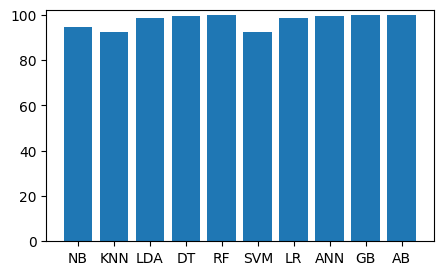

In [ ]:
names = ['NB','KNN','LDA','DT','RF','SVM','LR', 'ANN','GB','AB']
values = [GNB_train_score*100,0.9246*100,LDA_train_score*100,DT_train_score*100,RF_train_score*100,0.9245*100,LR_train_score*100,ANN_train_score*100,GB_train_score*100,AB_train_score*100]
f = plt.figure(figsize=(17,3),num=10)
plt.subplot(131)
plt.ylim(0,102)
plt.bar(names,values)

TEST ACCURACY

<BarContainer object of 10 artists>

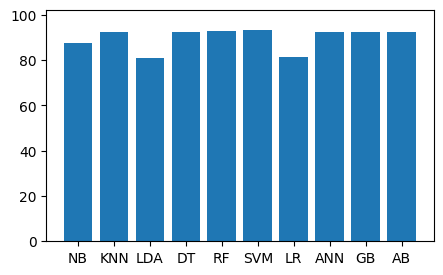

In [ ]:
names = ['NB','KNN','LDA','DT','RF','SVM','LR', 'ANN','GB','AB']
values = [GNB_test_score*100,0.9246*100,LDA_test_score*100,DT_test_score*100,RF_test_score*100,0.934*100,LR_test_score*100,ANN_test_score*100,GB_test_score*100,AB_test_score*100]
f = plt.figure(figsize=(17,3),num=10)
plt.subplot(131)
plt.ylim(0,102)
plt.bar(names,values)

<BarContainer object of 10 artists>

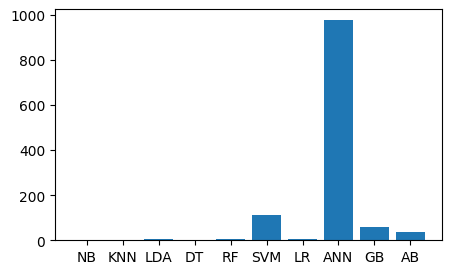

In [ ]:
names = ['NB','KNN','LDA','DT','RF','SVM','LR', 'ANN','GB','AB']
values = [GNB_train_time , 2.26,LDA_train_time ,DT_train_time,RF_train_time,114,LR_train_time,ANN_train_time,59.635,AB_train_time]
f = plt.figure(figsize=(17,3),num=10)
plt.subplot(131)
plt.bar(names,values)

<BarContainer object of 10 artists>

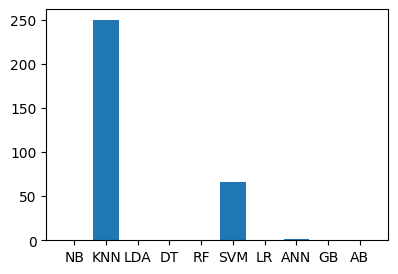

In [ ]:
names = ['NB','KNN','LDA','DT','RF','SVM','LR', 'ANN','GB','AB']
values = [GNB_test_time,249.879,LDA_test_time,DT_test_time,RF_test_time,66.36,LR_test_time,ANN_test_time,0.066,AB_test_time ]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values)